# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)  # TODO

temps_df.head()

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [40]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df['Date'] = pd.to_datetime(temps_df['Date']).dt.date


In [21]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

temps_df["AvgTemperatureCelsius"] = temps_df['AvgTemperatureFahrenheit'].apply(lambda t: round((t-32)*(5/9),2))  # TODO: uncomment this line to complete it

temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.39
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.00
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.50
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.11
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.06
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.61
72728,US,Washington,49.6,2019-12-28,12,2019,9.78
72729,US,Washington,48.9,2019-12-29,12,2019,9.39
72730,US,Washington,55.0,2019-12-30,12,2019,12.78


In [22]:
# Ex 3.3: How many different cities are there? Provide a list of them. --IS THIS MEANT TO BE COUNTRIES INSTEAD OF CITIES?

unique_countries_list = list(temps_df['Country'].unique())  # TODO: this should be a list of unique countries

print(f'There are {len(unique_countries_list)} countries in the dataset:')
for c in unique_countries_list:
    print(c)# TODO: print a message with the number of unique countries and the list of them

There are 10 countries in the dataset:
Argentina
Australia
Colombia
Egypt
Germany
India
Japan
Senegal
South Africa
US


In [23]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = min(temps_df['Date'])  # TODO
max_date = max(temps_df['Date'])  # TODO

print(f'The min date of the dataset is {min_date}, while the max is {max_date}')# TODO: print a message with the min and max dates

The min date of the dataset is 2000-01-01, while the max is 2019-12-31


In [25]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp = min(temps_df['AvgTemperatureCelsius'])  # TODO
max_temp = max(temps_df['AvgTemperatureCelsius'])  # TODO

min_temp_df = temps_df[(temps_df['AvgTemperatureCelsius'] == min_temp)][['City','Date','AvgTemperatureCelsius']]
max_temp_df = temps_df[(temps_df['AvgTemperatureCelsius'] == max_temp)][['City','Date','AvgTemperatureCelsius']]


print(f'The global temperature was at is maximum of {max_temp} in {max_temp_df['City'].values[0]} on the {max_temp_df['Date'].values[0]}')
print(f'The global temperature was at is minimum of {min_temp} in {min_temp_df['City'].values[0]} on the {min_temp_df['Date'].values[0]}')

# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date

The global temperature was at is maximum of 37.89 in Cairo on the 2019-05-23
The global temperature was at is minimum of -16.78 in Munich on the 2000-01-25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


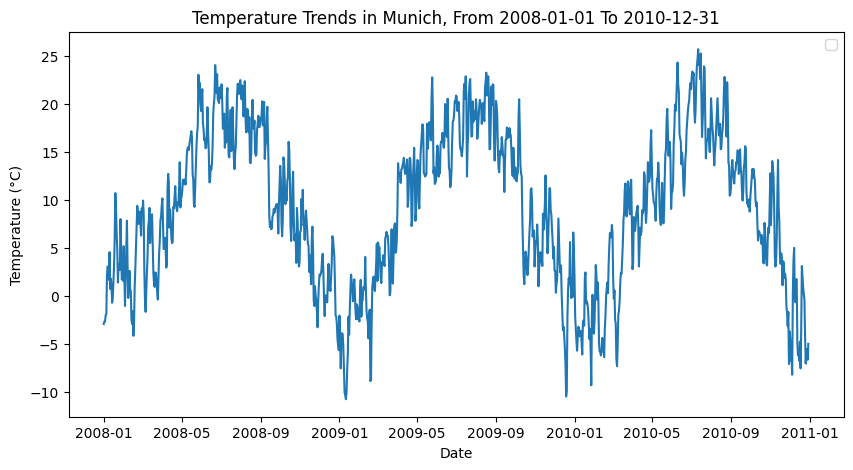

In [36]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df['City'] == city]          # TODO: get a dataframe with the rows of the selected city

city_df_period = city_df[(city_df['Date']>= start_date)&(city_df['Date']<end_date)]   # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

plt.figure(figsize=(10, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

plt.plot(city_df_period['Date'],city_df_period['AvgTemperatureCelsius'])    # TODO
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Trends in {city}, From {start_date} To {end_date}')
plt.legend()

plt.show()


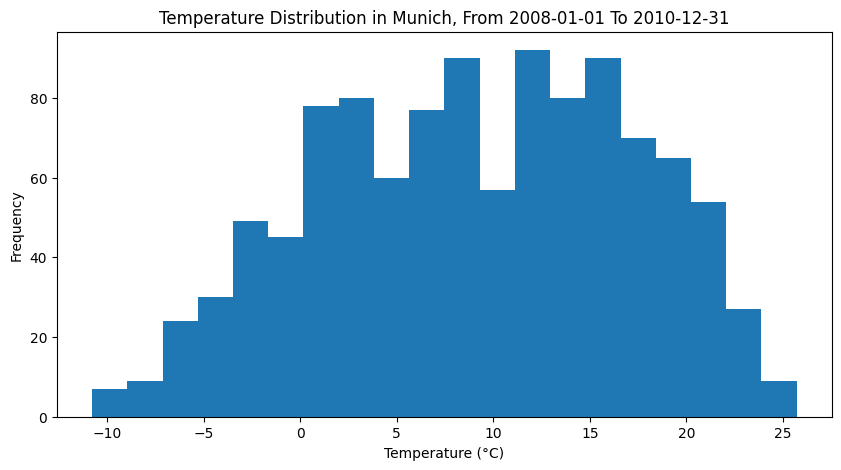

In [39]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

plt.hist(city_df_period['AvgTemperatureCelsius'],bins=20)    # TODO: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20
plt.title(f'Temperature Distribution in {city}, From {start_date} To {end_date}')   # TODO
plt.ylabel('Frequency')  # TODO
plt.xlabel('Temperature (°C)')  # TODO

plt.show()

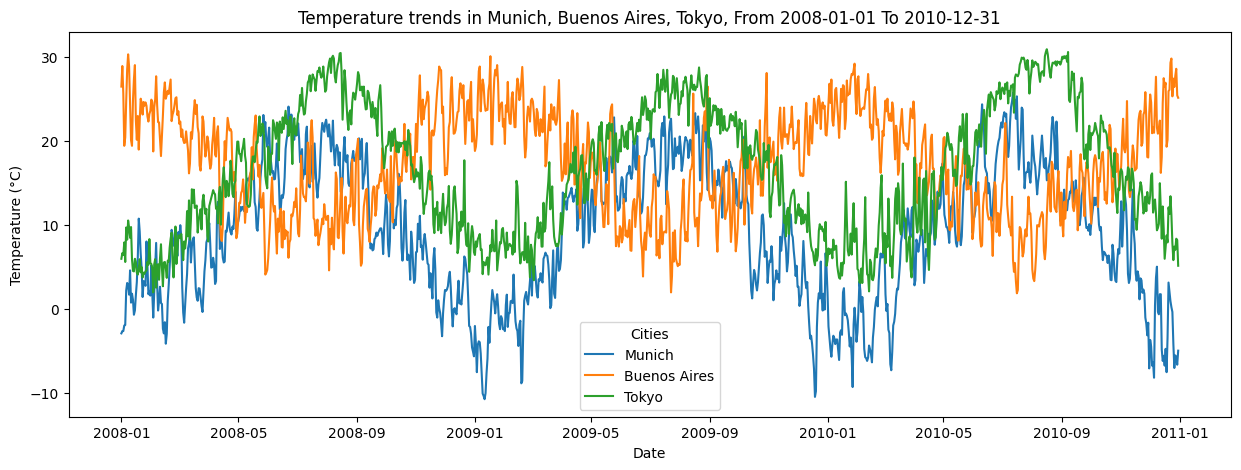

In [46]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

for city in selected_cities:
    city_df = temps_df[temps_df['City']==city]            # TODO: get a dataframe with the rows of the selected city
    city_df_period = city_df[(city_df['Date']>= start_date)&(city_df['Date']<end_date)]     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
    plt.plot(city_df_period['Date'],city_df_period['AvgTemperatureCelsius'],label=city)                # TODO plot each city line and use the label parameter to set the legend name for each city

title = f'Temperature trends in {', '.join(selected_cities)}, From {start_date} To {end_date}'

plt.title(title)   # TODO
plt.xlabel('Date')  # TODO
plt.ylabel('Temperature (°C)')  # TODO

plt.legend(title='Cities')

plt.show()


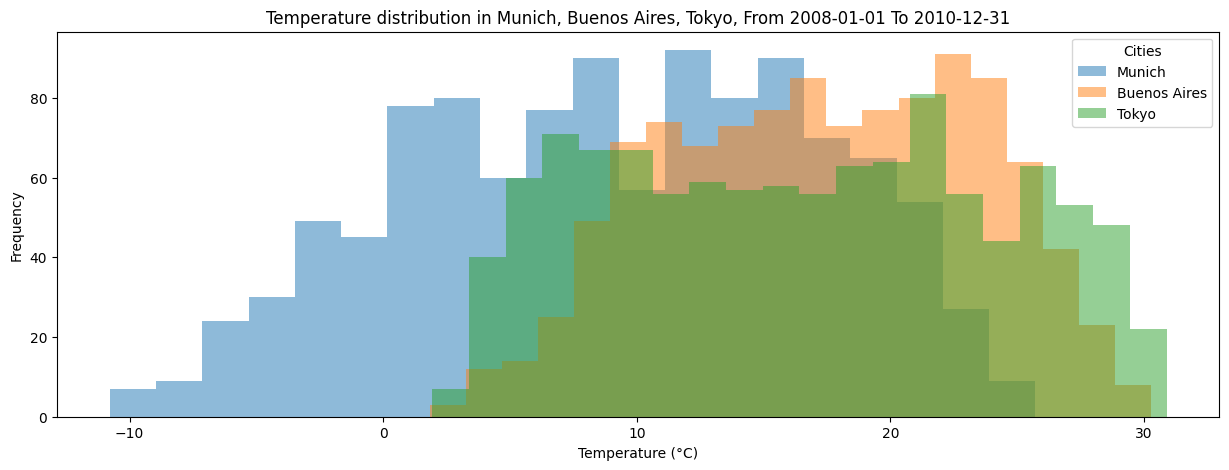

In [53]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

for city in selected_cities:
    city_df = temps_df[temps_df['City']==city]            # TODO: get a dataframe with the rows of the selected city
    city_df_period = city_df[(city_df['Date']>= start_date)&(city_df['Date']<end_date)]     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
    plt.hist(city_df_period['AvgTemperatureCelsius'], alpha= 0.5, bins=20, label=city)                    # TODO: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 

plt.title(f'Temperature distribution in {', '.join(selected_cities)}, From {start_date} To {end_date}')   # TODO
plt.xlabel('Temperature (°C)')  # TODO
plt.ylabel('Frequency')  # TODO

plt.legend(title='Cities')

plt.show()
